<a href="https://colab.research.google.com/github/justincharney/Python_Machine_Learning/blob/main/BERT_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading the Data

## Setup (importing data and packages)

In [ ]:
!pip install -Uq transformers

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
from fastai.learner import Learner
from fastai.text.all import *
import torch

In [ ]:
device = torch.device('cuda:0')

In [ ]:
path = untar_data(URLs.IMDB) #IMDB_SAMPLE
path.ls()

(#7) [Path('/root/.fastai/data/imdb/README'),Path('/root/.fastai/data/imdb/tmp_lm'),Path('/root/.fastai/data/imdb/tmp_clas'),Path('/root/.fastai/data/imdb/test'),Path('/root/.fastai/data/imdb/train'),Path('/root/.fastai/data/imdb/unsup'),Path('/root/.fastai/data/imdb/imdb.vocab')]

In [ ]:
(path/'train/pos').ls()

(#12500) [Path('/root/.fastai/data/imdb/train/pos/8034_10.txt'),Path('/root/.fastai/data/imdb/train/pos/11109_9.txt'),Path('/root/.fastai/data/imdb/train/pos/3071_9.txt'),Path('/root/.fastai/data/imdb/train/pos/10563_7.txt'),Path('/root/.fastai/data/imdb/train/pos/10547_9.txt'),Path('/root/.fastai/data/imdb/train/pos/4978_7.txt'),Path('/root/.fastai/data/imdb/train/pos/2180_8.txt'),Path('/root/.fastai/data/imdb/train/pos/8833_9.txt'),Path('/root/.fastai/data/imdb/train/pos/8459_10.txt'),Path('/root/.fastai/data/imdb/train/pos/11700_10.txt')...]

In [ ]:
(path/'train/neg').ls()

(#12500) [Path('/root/.fastai/data/imdb/train/neg/5826_1.txt'),Path('/root/.fastai/data/imdb/train/neg/10541_4.txt'),Path('/root/.fastai/data/imdb/train/neg/2330_4.txt'),Path('/root/.fastai/data/imdb/train/neg/2128_3.txt'),Path('/root/.fastai/data/imdb/train/neg/6977_4.txt'),Path('/root/.fastai/data/imdb/train/neg/2278_4.txt'),Path('/root/.fastai/data/imdb/train/neg/12306_2.txt'),Path('/root/.fastai/data/imdb/train/neg/315_1.txt'),Path('/root/.fastai/data/imdb/train/neg/1589_1.txt'),Path('/root/.fastai/data/imdb/train/neg/1370_2.txt')...]

## Train DF

In [ ]:
import os, glob, csv
from tqdm import tqdm

In [ ]:
# Define relative path to folder containing the text files

files_folder = path/'train/pos'

file_list = glob.glob(os.path.join(os.getcwd(), files_folder, "*.txt"))

corpus = []

for file_path in file_list:
    with open(file_path) as f_input:
        corpus.append(f_input.read())

In [ ]:
df = pd.DataFrame(corpus, columns=["Text"])

In [ ]:
df['Label'] = 1
df

,Text,Label
0,"There are few movies that appear to provide enterntainment as well as realism. If you've ever wondered about the role of snipers in modern war, take a look at this one. <br /><br />I just loved the scene where hundred soldiers get shooting at the jungle, no-one quite sure where that shot came?<br /><br />And, they nicked one scene to Saving Private Ryan, so it has to have some merit in the scene.<br /><br />",1
1,"The Sopranos stands out as an airtight, dynamic exploration of American life, and how the American experience is shaped and defined by money. By setting the story in the milieu of the underworld, David Chase eliminates all barriers to a grunt, low to the ground and outright mean deconstruction of the post-modern era. <br /><br />Every character represents a facet of American industry. Tony Soprano exemplifies the beleaguered working stiff, torn between familial duty and a need to keep his ""business"" on an even keel. The convergence of these two things is the imperative that keeps the story...",1
2,"Panic delivers the goods ten fold with Oscar caliber performances from William H Macy, Neve Campbell, and Donald Sutherland. In a movie about the choices we make and the consequences we live with. Chillingly Honest and thought provoking, Panic is easily one of the best film to come out of Hollywood in years. The impact stays with you right after you leave the theater.",1
3,"Wow... what... a whirlwind. The 30's is a decade with plenty of movies of every type I can imagine, especially during the early talkies phase. There were movies which are painfully static and dull, like ""Dracula"" with Bella Lugosi, and there were those that just don't give it a rest, sometimes in a good way and other times not. This is one of the films that don't stop for a minute, and that is both a wonder and a pity. Lloyd Bacon, who also directed ""42nd Street"", must have been the king of the Depression Era musicals and he was probably excited with the possibilities sound brought to the ...",1
4,"I watched the trailer on the DVD after seeing the film, and I think anyone who saw it before watching the film would be very surprised and possibly disappointed. It made much of the fact that the film was ""by the director of Cube"" and made it look like a horror film, when in fact it is an Absurdist comedy (IMDB's spell checker doesn't seem to think that Absurdist is a word, but it is), reminiscent of Rosencrantz and Guildernstern are Dead.<br /><br />I love the way the story builds up slowly at first, then gradually escalates. I also enjoy the fact that no explanation is given for what hap...",1
...,...,...
12495,"Sure, it was cheesy and nonsensical and at times corny, but at least the filmmakers didn't try. While most TV movies border on the brink of mediocrity, this film actually has some redeeming qualities to it. The cinematography was pretty good for a TV film, and Viggo Mortensen displays shades of Aragorn in a film about a man who played by his own rules. Most of the flashback sequences were kind of cheesy, but the scene with the mountain lion was intense. I was kind of annoyed by Jason Priestly's role in the film as a rebellious shock-jock, but then again, it's a TV MOVIE! Despite all of the...",1
12496,"I loved this movie. The scenery was breathtaking, the plot had some nice twists and turns, and the characters were well rounded. On two fronts, however, ""Rob Roy"" scored far above average. First, I have rarely seen a ""popular"" film in which the quality of dialogue was so high. There were many verbal slashes and thrusts to accompany the brilliantly choreographed swordplay. I could give numerous examples, but why should I? Just watch the film. Second, this movie understood a principle rarely acknowledged any more. For a drama to succeed, it needs not only a hero, but a really believable vill...",1
12497,"Anne Brontes epic novel THE TENANT OF WILDFELL HALL should be studied and read throughout schools and libraries and peoples 

In [ ]:
# Define relative path to folder containing the text files

files_folder = path/'train/neg'

file_list = glob.glob(os.path.join(os.getcwd(), files_folder, "*.txt"))

corpus = []

for file_path in file_list:
    with open(file_path) as f_input:
        corpus.append(f_input.read())

In [ ]:
df2 = pd.DataFrame(corpus, columns=["Text"])

In [ ]:
df2['Label'] = 0

train_df = pd.concat([df, df2], axis=0, ignore_index=True)
train_df

,Text,Label
0,"There are few movies that appear to provide enterntainment as well as realism. If you've ever wondered about the role of snipers in modern war, take a look at this one. <br /><br />I just loved the scene where hundred soldiers get shooting at the jungle, no-one quite sure where that shot came?<br /><br />And, they nicked one scene to Saving Private Ryan, so it has to have some merit in the scene.<br /><br />",1
1,"The Sopranos stands out as an airtight, dynamic exploration of American life, and how the American experience is shaped and defined by money. By setting the story in the milieu of the underworld, David Chase eliminates all barriers to a grunt, low to the ground and outright mean deconstruction of the post-modern era. <br /><br />Every character represents a facet of American industry. Tony Soprano exemplifies the beleaguered working stiff, torn between familial duty and a need to keep his ""business"" on an even keel. The convergence of these two things is the imperative that keeps the story...",1
2,"Panic delivers the goods ten fold with Oscar caliber performances from William H Macy, Neve Campbell, and Donald Sutherland. In a movie about the choices we make and the consequences we live with. Chillingly Honest and thought provoking, Panic is easily one of the best film to come out of Hollywood in years. The impact stays with you right after you leave the theater.",1
3,"Wow... what... a whirlwind. The 30's is a decade with plenty of movies of every type I can imagine, especially during the early talkies phase. There were movies which are painfully static and dull, like ""Dracula"" with Bella Lugosi, and there were those that just don't give it a rest, sometimes in a good way and other times not. This is one of the films that don't stop for a minute, and that is both a wonder and a pity. Lloyd Bacon, who also directed ""42nd Street"", must have been the king of the Depression Era musicals and he was probably excited with the possibilities sound brought to the ...",1
4,"I watched the trailer on the DVD after seeing the film, and I think anyone who saw it before watching the film would be very surprised and possibly disappointed. It made much of the fact that the film was ""by the director of Cube"" and made it look like a horror film, when in fact it is an Absurdist comedy (IMDB's spell checker doesn't seem to think that Absurdist is a word, but it is), reminiscent of Rosencrantz and Guildernstern are Dead.<br /><br />I love the way the story builds up slowly at first, then gradually escalates. I also enjoy the fact that no explanation is given for what hap...",1
...,...,...
24995,"Not even Bob Hope, escorted by a raft of fine character actors, can save this poorly written attempt at wartime comedy, as his patented timing has little which which to work. The plot involves a Hollywood film star named Don Bolton (Hope), and his attempt to evade military service at the beginning of World War II, followed by his enlistment by mistake in a confused attempt to court a colonel's daughter (Dorothy Lamour). Bolton's agent, played by Lynne Overman, and his assistant, portrayed by Eddie Bracken, enlist with him and the three are involved in various escapades regarding training e...",0
24996,"Set in South Africa, a young black guy tries to land a part in a 'gangsta' movie. But with no knowledge of street life, he's told to find out what that life is really like or he won't get the part. He manages to work his way into a gang led by an old friend of his from school and his chances of appearing in the film decline as he commits crimes to be accepted. But for the gang's leader, the burgeoning disaster of his new friend's life suggests a golden opportunity to do something better with his own.<br /><br />While that may sound relatively interesting, it's anything but. The first half ...",0
24997,"This film essentially deals with Inspector Gadget's arch-nemesis Doctor Claw who has returned after many years to the now-peacef

## Valid DF

In [ ]:
files_folder = path/'test/pos'

file_list = glob.glob(os.path.join(os.getcwd(), files_folder, "*.txt"))

corpus = []

for file_path in file_list:
    with open(file_path) as f_input:
        corpus.append(f_input.read())

In [ ]:
df3 = pd.DataFrame(corpus, columns=["Text"])
df3['Label'] = 1

In [ ]:
files_folder = path/'test/neg'

file_list = glob.glob(os.path.join(os.getcwd(), files_folder, "*.txt"))

corpus = []

for file_path in file_list:
    with open(file_path) as f_input:
        corpus.append(f_input.read())

In [ ]:
df4 = pd.DataFrame(corpus, columns=["Text"])
df4['Label'] = 0

In [ ]:
test_df = pd.concat([df3, df4], axis=0, ignore_index=True)
test_df

,Text,Label
0,"A remarkable film, bringing to the surface all sorts of feelings I had when I was much, much younger. I loved it, and the Elton John music. I remember seeing in in the movies when I was a kid, and for some reason (limited release?) I've never known anyone else who saw this film when it was released.<br /><br />The dreams it inspired in me from decades ago have never left me, and seeing the film again recently brought it all rushing back, I confess, however, that my kids (in their 20's) have not experienced a similar emotional rush. A generational thing?<br /><br />Why is it not on DVD?",1
1,"We really liked this movie. It wasn't trying to be outrageous, controversial, clever or profound. It was just entertaining and was what it said on the box a charming romantic comedy. Every other Brit film maker seems to want to change the world, nice to see one that just concentrates on telling a good yarn with elegant style.",1
2,"One of the best movies ever, the idea of a double interpretation involves we all. <br /><br />Would be Prot a schizophrenic or an E.T? (No doubt in my opinion, but let's keep the question open...). Kevin Spacey, the big screen monster, plays Prot as it should be done. Let's not forget Jeff Bridges and his great psychiatric. <br /><br />Lastly, a masterpiece that speakes for itself. Can keep our eyes wide open from the beginning to the credits and our minds thinking even when the movie is over. If you still didn't watch it, go right now! And again, again...",1
3,"FIVE STAR FINAL was one of the best films of the early 1930s. It starred Edward G. Robinson and was a very gritty story about a sleazy newspaper and their willingness to do anything...ANYTHING to sell newspapers. In particular, an old story of an innocent woman is plastered across the pages and helps to destroy her now happy life--many years after she was inadvertently involved in a scandal. The reason I loved the film so much was that it was unflinching and pulled no punches--showing just how low the publishers can be to sell papers.<br /><br />Here in TWO AGAINST THE WORLD, it is a remak...",1
4,"i was part of the cast of Space Odyssey, playing FIDO in mission control. i just want to say that none of us actors, specially those in mission control who had to react to a green screen most of the time, had any idea how amazing it would turn out to be. i knew it was going to be good, if only for the sheer camaraderie and professionalism that the production team at Impossible Pictures provided for everyone involved. but when we all saw it for the first time at the screening at the Curzon Mayfair, well, i for one felt very proud. I was so glad that none of us looked like we were in Star Tr...",1
...,...,...
24995,"Awful film. Terrible acting, cheesy, totally unrealistic, embarrassing to anyone who has played the game. For a start that guy is not a hooker, he would be snapped in two. As for ''I score, that's my job'' well no it's not. For the the uneducated American audience it might come across as a good film. For me, well, that's a few hours of my life I'll never get back. I read through the reviews and came across one where the guy sounded like he knew what he was talking about. Then I read - <br /><br />''And while American rugby may never reach the level of talent that New Zealand or South Afric...",0
24996,"This movie was thoroughly unwholesome, unsettling and unsatisfying. Apart from a few nice shots of Italy, there's nothing to recommend this movie. As usual, Hollywood draws the wrong conclusion from a fractured existence--the _next_ guy you meet, whom you sleep with after knowing for a few hours, _he_ must be Mr. Right. As for humor, there is some in the movie, but I can't see how anyone could possibly label this a romantic _comedy_ since about three-quarters of the movie is totally depressing! My recommendation? Skip it in the theaters, wait till it comes out on DVD, then skip it there al...",0
24997,"Critters 3 starts on the open road 

## Setup model and tokenizer

In [ ]:
hf_tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
class HF_Dataset(torch.utils.data.Dataset):
    def __init__(self, df, hf_tokenizer):
        self.df = df
        self.hf_tokenizer = hf_tokenizer
        
    def __len__(self):
        return len(self.df)

    def decode(self, token_ids):
        return ' '.join([hf_tokenizer.decode(x) for x in tokenizer_outputs['input_ids']])

    def __getitem__(self, index):
        text, label = self.df.iloc[index]
        label = torch.tensor(label)

        tokenizer_output = self.hf_tokenizer(text, return_tensors="pt", padding='max_length', truncation=True, max_length=512)
        
        tokenizer_output['input_ids'].squeeze_()
        tokenizer_output['attention_mask'].squeeze_()
        
        return tokenizer_output.to(device), label.to(device)

In [ ]:
train_dataset = HF_Dataset(train_df, hf_tokenizer)
valid_dataset = HF_Dataset(test_df, hf_tokenizer)

In [ ]:
len(train_dataset), len(valid_dataset)

(25000, 25000)

In [ ]:
tokenizer_outputs, label = train_dataset[0]
tokenizer_outputs.keys(), label

(dict_keys(['input_ids', 'attention_mask']), tensor(1, device='cuda:0'))

In [ ]:
train_dataset.decode(tokenizer_outputs['input_ids'])[:500]

"[CLS] there are few movies that appear to provide enter ##nta ##in ##ment as well as realism . if you ' ve ever wondered about the role of sniper ##s in modern war , take a look at this one . < br / > < br / > i just loved the scene where hundred soldiers get shooting at the jungle , no - one quite sure where that shot came ? < br / > < br / > and , they nick ##ed one scene to saving private ryan , so it has to have some merit in the scene . < br / > < br / > [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] "

In [ ]:
train_dl = DataLoader(train_dataset, bs=32, shuffle=True)
valid_dl = DataLoader(valid_dataset, bs=32)
dls = DataLoaders(train_dl, valid_dl)

## Batched Data

In [ ]:
batched_data, batched_labels = train_dl.one_batch()
batched_data.keys(), batched_data['input_ids'].shape, batched_labels.shape

(dict_keys(['input_ids', 'attention_mask']),
 torch.Size([32, 512]),
 torch.Size([32]))

In [ ]:
class HF_Model(nn.Module):
  
    def __init__(self, hf_model):
        super().__init__()
        
        self.hf_model = hf_model
        
    def forward(self, tokenizer_outputs):
        model_output = self.hf_model(**tokenizer_outputs)
        
        return model_output.logits

# Testing saved model performance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#--------Define your working directory here-------------------------------------
working_directory = "/content/drive/MyDrive/COMP 551/"
#-------------------------------------------------------------------------------

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
lg_model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased").to(device)
model = HF_Model(lg_model).to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
valid_dl = DataLoader(valid_dataset, bs=64, shuffle=False)

In [ ]:
import sklearn.metrics as skm
#-------loading learners onto GPU change device=None to load to CPU-------------
FullBERT_learner = Learner.load(self=Learner(dls, model, loss_func=CrossEntropyLossFlat()), file=str(working_directory+"AdamW_FullBERT"), device=device, with_opt=True, strict=True)

/usr/local/lib/python3.8/dist-packages/fastai/learner.py:57: UserWarning: Could not load the optimizer state.
  if with_opt: warn("Could not load the optimizer state.")


In [ ]:
predictions2 = FullBERT_learner.get_preds(dl=valid_dl)
predictions2

(tensor([[1.5915e-03, 9.9841e-01],
         [1.2762e-03, 9.9872e-01],
         [2.0652e-03, 9.9793e-01],
         ...,
         [9.9969e-01, 3.1409e-04],
         [9.9057e-01, 9.4265e-03],
         [9.9433e-01, 5.6651e-03]]), tensor([1, 1, 1,  ..., 0, 0, 0]))

In [ ]:
print(f"AUROC= {skm.roc_auc_score(test_df['Label'], predictions2[0][:,1])}")
print(f"Accuracy= {skm.accuracy_score(test_df['Label'], (predictions2[0][:,1]>0.5))}")

AUROC= 0.9738551744
Accuracy= 0.94136


# Model Training Code

## Small BERT ULMFit (experiments)


In [ ]:
hf_model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased").to(device) #only use .to(device) if a gpu is connected
model = HF_Model(hf_model).to(device)

### Fit one cycle

In [ ]:
#learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=[accuracy])

In [ ]:
#learn.fit_one_cycle(4, 2e-5)

In [ ]:
# SAVE AND LOAD MODEL
#learn.save('BERT')

#loaded_learn = Learner.load('BERT')

### Gradual Unfreezing and Discriminative learning rates

In [ ]:
def my_splitter(m): return L(m.hf_model.distilbert.embeddings, 
                             m.hf_model.distilbert.transformer.layer[0],
                             m.hf_model.distilbert.transformer.layer[1],
                             m.hf_model.distilbert.transformer.layer[2],
                             m.hf_model.distilbert.transformer.layer[3],
                             m.hf_model.distilbert.transformer.layer[4],
                             m.hf_model.distilbert.transformer.layer[5],      
                             m.hf_model.pre_classifier).map(params)

Using the ranger optimizer here, but it is worth trying just with Adam too

In [ ]:
#learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), splitter=my_splitter, opt_func=ranger, metrics=[accuracy]).to_fp16()

In [ ]:
from torch import optim

learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), splitter=my_splitter, opt_func=None, metrics=[accuracy], cbs=[MixedPrecision,FP16TestCallback])
learn.opt=OptimWrapper(opt=optim.AdamW(model.parameters(), lr=1e-3))

Based on https://arxiv.org/abs/1801.06146

In [ ]:
learn.freeze_to(-1)
learn.lr_find()

IndexError: ignored

In [ ]:
lr = 3e-5
learn.fit_flat_cos(1, lr) #cbs=ParamScheduler({'lr': lr_scheduler})

epoch,train_loss,valid_loss,accuracy,time
0,0.182550,0.181624,0.930040,03:10


In [ ]:
#lr /= 2
lr = 1e-7
learn.freeze_to(-2)
learn.fit_flat_cos(1, slice(lr/(2.6**4),lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.003957,0.332507,0.933200,03:11


In [ ]:
lr /= 2 
learn.freeze_to(-3)
learn.fit_flat_cos(1, slice(lr/(2.6**4),lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.082014,0.200152,0.932720,03:13


In [ ]:
lr /= 2 
learn.freeze_to(-4)
learn.fit_one_cycle(1, slice(lr/(2.6**4),lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.066425,0.219886,0.932640,03:13


In [ ]:
lr /= 2
learn.freeze_to(-5)
learn.fit_one_cycle(1, slice(lr/(2.6**4),lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.046423,0.236074,0.932400,03:14


In [ ]:
lr /= 2 
learn.freeze_to(-6)
learn.fit_one_cycle(1, slice(lr/(2.6**4),lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.042065,0.247319,0.933560,03:13


In [ ]:
lr /= 2 
learn.freeze_to(-7)
learn.fit_one_cycle(1, slice(lr/(2.6**4),lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.016336,0.251004,0.932000,03:13


In [ ]:
lr /= 2 
learn.unfreeze()
learn.fit_one_cycle(1, slice(lr/(2.6**4),lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.024343,0.254143,0.933000,03:14


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Saving the model
learn.save("/content/drive/MyDrive/COMP 551/ULMFit_AdamW_BERT.pth")

Path('/content/drive/MyDrive/COMP 551/ULMFit_AdamW_BERT.pth.pth')

## Full BERT (Best Performance)

### Model Creation

In [ ]:
#lg_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
lg_model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased").to(device)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
# model
model = HF_Model(lg_model).to(device)
model

HF_Model(
  (hf_model): BertForSequenceClassification(
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0): BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_features=768, bias=True)

In [ ]:
def lg_splitter(m): return L(m.hf_model.encoder.layer[9],
                             m.hf_model.encoder.layer[10],
                             m.hf_model.encoder.layer[11],      
                             m.hf_model.pooler).map(params)

In [ ]:
from torch import optim

lg_learner = Learner(dls, model, loss_func=CrossEntropyLossFlat(), splitter=lg_splitter, opt_func=None, metrics=[accuracy], cbs=[MixedPrecision,FP16TestCallback])
lg_learner.opt=OptimWrapper(opt=optim.AdamW(model.parameters(), lr=1e-3))

### Training (2 epochs only output layer tuning)

SuggestedLRs(valley=3.0199516913853586e-05)

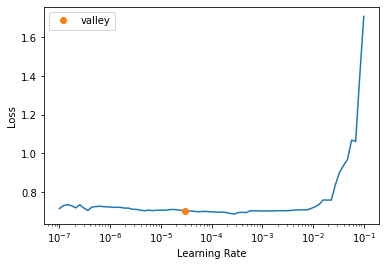

In [ ]:
lg_learner.freeze_to(-1)
lg_learner.lr_find()

In [ ]:
lr = 3e-5
lg_learner.fit_one_cycle(2, lr)

After just two epochs we already obtained 94.1 % accuracy on the validation (testing) set so we saved the model in between. However, it turns out this is the best performance that was achieved during the ULMFit procedure so it is ultimately the version we are using for the trying out of the models parts.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Saving the model
lg_learner.export("/content/drive/MyDrive/COMP 551/ULMFit_AdamW_FullBERT")

### (ULMFit Continued from above) 
Overall no better performance than above was achieved using ULMFit

In [ ]:
lg_learner.fit_one_cycle(2, lr)

In [ ]:
lr /= 2
lg_learner.freeze_to(-2)
lg_learner.fit_one_cycle(3, slice(lr/(2.6**4),lr))
lg_learner.fit_flat_cos(3, slice(lr/(2.6**4),lr))

In [ ]:
lr /= 2
lg_learner.fit_one_cycle(3, slice(lr/(2.6**4),lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.007718,0.338128,0.939240,04:45
1,0.001385,0.340029,0.941080,04:45
2,0.000687,0.344319,0.941360,04:45


In [ ]:
lr /= 2 
lg_learner.freeze_to(-3)
lg_learner.fit_flat_cos(1, slice(lr/(2.6**4),lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.002583,0.398744,0.938640,04:45


We already obtained over 94.1 % accuracy using only the first two training epochs so the model that was obtained here is not saved but discarded.

### Training (8 epochs only output layer tuning)

In [ ]:
lg_learner.freeze_to(-1)
lg_learner.lr_find()

In [ ]:
lr = 4e-5
lg_learner.fit_one_cycle(8, lr)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Saving the model
lg_learner.save("/content/drive/MyDrive/COMP 551/OneLayer_AdamW_FullBERT")

Longer training performed approximately as well as did the training for only 2 epochs before. This model was saved.

### Training (Tuning whole model unfrozen)

SuggestedLRs(valley=3.0199516913853586e-05)

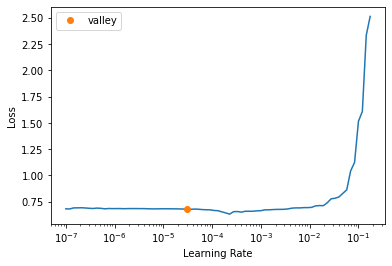

In [ ]:
lg_learner.lr_find()

In [ ]:
lr = 3e-5 
lg_learner.fit_one_cycle(8, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.209903,0.205899,0.917320,04:42
1,0.188483,0.171685,0.934320,04:42
2,0.125676,0.165889,0.938440,04:42
3,0.052229,0.219639,0.938560,04:42
4,0.033899,0.223253,0.939880,04:42
5,0.011763,0.284375,0.940480,04:42
6,0.010143,0.284674,0.941520,04:42
7,0.003020,0.291741,0.941440,04:42


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Saving the model
lg_learner.save("/content/drive/MyDrive/COMP 551/AdamW_FullBERT")

Mounted at /content/drive


Path('/content/drive/MyDrive/COMP 551/AdamW_FullBERT.pth')